# Загрузка данных в ноутбук

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../../Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../../Kaggle/xxx_test.csv
../../Kaggle/xxx_train.csv
../../Kaggle/xxx_submission.csv


In [5]:
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


In [6]:
train = pd.read_csv('../../Kaggle/xxx_train.csv')
test = pd.read_csv('../../Kaggle/xxx_test.csv')
# размеры данных
print(train.shape, test.shape)

(10000, 301) (50000, 300)


In [7]:
train.sample(5)

,X_0_0,X_0_1,X_0_2,X_1_0,X_1_1,X_1_2,X_2_0,X_2_1,X_2_2,X_3_0,X_3_1,X_3_2,X_4_0,X_4_1,X_4_2,X_5_0,X_5_1,X_5_2,X_6_0,X_6_1,X_6_2,X_7_0,X_7_1,X_7_2,X_8_0,X_8_1,X_8_2,X_9_0,X_9_1,X_9_2,X_10_0,X_10_1,X_10_2,X_11_0,X_11_1,X_11_2,X_12_0,X_12_1,X_12_2,X_13_0,X_13_1,X_13_2,X_14_0,X_14_1,X_14_2,X_15_0,X_15_1,X_15_2,X_16_0,X_16_1,X_16_2,X_17_0,X_17_1,X_17_2,X_18_0,X_18_1,X_18_2,X_19_0,X_19_1,X_19_2,X_20_0,X_20_1,X_20_2,X_21_0,X_21_1,X_21_2,X_22_0,X_22_1,X_22_2,X_23_0,X_23_1,X_23_2,X_24_0,X_24_1,X_24_2,X_25_0,X_25_1,X_25_2,X_26_0,X_26_1,X_26_2,X_27_0,X_27_1,X_27_2,X_28_0,X_28_1,X_28_2,X_29_0,X_29_1,X_29_2,X_30_0,X_30_1,X_30_2,X_31_0,X_31_1,X_31_2,X_32_0,X_32_1,X_32_2,X_33_0,X_33_1,X_33_2,X_34_0,X_34_1,X_34_2,X_35_0,X_35_1,X_35_2,X_36_0,X_36_1,X_36_2,X_37_0,X_37_1,X_37_2,X_38_0,X_38_1,X_38_2,X_39_0,X_39_1,X_39_2,X_40_0,X_40_1,X_40_2,X_41_0,X_41_1,X_41_2,X_42_0,X_42_1,X_42_2,X_43_0,X_43_1,X_43_2,X_44_0,X_44_1,X_44_2,X_45_0,X_45_1,X_45_2,X_46_0,X_46_1,X_46_2,X_47_0,X_47_1,X_47_2,X_48_0,X_48_1,X_48_2,X_49_0,X_49_1,X_49_2,X_50_0,X_50_1,X_50_2,X_51_0,X_51_1,X_51_2,X_52_0,X_52_1,X_52_2,X_53_0,X_53_1,X_53_2,X_54_0,X_54_1,X_54_2,X_55_0,X_55_1,X_55_2,X_56_0,X_56_1,X_56_2,X_57_0,X_57_1,X_57_2,X_58_0,X_58_1,X_58_2,X_59_0,X_59_1,X_59_2,X_60_0,X_60_1,X_60_2,X_61_0,X_61_1,X_61_2,X_62_0,X_62_1,X_62_2,X_63_0,X_63_1,X_63_2,X_64_0,X_64_1,X_64_2,X_65_0,X_65_1,X_65_2,X_66_0,X_66_1,X_66_2,X_67_0,X_67_1,X_67_2,X_68_0,X_68_1,X_68_2,X_69_0,X_69_1,X_69_2,X_70_0,X_70_1,X_70_2,X_71_0,X_71_1,X_71_2,X_72_0,X_72_1,X_72_2,X_73_0,X_73_1,X_73_2,X_74_0,X_74_1,X_74_2,X_75_0,X_75_1,X_75_2,X_76_0,X_76_1,X_76_2,X_77_0,X_77_1,X_77_2,X_78_0,X_78_1,X_78_2,X_79_0,X_79_1,X_79_2,X_80_0,X_80_1,X_80_2,X_81_0,X_81_1,X_81_2,X_82_0,X_82_1,X_82_2,X_83_0,X_83_1,X_83_2,X_84_0,X_84_1,X_84_2,X_85_0,X_85_1,X_85_2,X_86_0,X_86_1,X_86_2,X_87_0,X_87_1,X_87_2,X_88_0,X_88_1,X_88_2,X_89_0,X_89_1,X_89_2,X_90_0,X_90_1,X_90_2,X_91_0,X_91_1,X_91_2,X_92_0,X_92_1,X_92_2,X_93_0,X_93_1,X_93_2,X_94_0,X_94_1,X_94_2,X_95_0,X_95_1,X_95_2,X_96_0,X_96_1,X_96_2,X_97_0,X_97_1,X_97_2,X_98_0,X_98_1,X_98_2,X_99_0,X_99_1,X_99_2,y
163,0.0,4.0,-1.00,1.0,29.0,0.00,0.0,5.0,-1.00,2.0,-1.0,0.44,3.0,88.0,0.13,3.0,23.0,2.26,0.0,2.0,-1.00,2.0,-1.0,0.19,0.0,5.0,-1.00,1.0,48.0,2.00,0.0,2.0,-1.00,1.0,51.0,2.00,1.0,35.0,0.00,3.0,62.0,2.15,1.0,90.0,0.00,1.0,94.0,2.00,1.0,31.0,1.00,1.0,83.0,2.00,3.0,64.0,2.57,0.0,4.0,-1.00,0.0,1.0,-1.00,2.0,-1.0,0.45,3.0,8.0,1.78,2.0,-1.0,1.10,3.0,12.0,1.93,0.0,2.0,-1.00,3.0,53.0,0.92,0.0,3.0,-1.0,2.0,-1.0,2.11,0.0,5.0,-1.00,3.0,92.0,0.22,1.0,47.0,3.00,1.0,52.0,0.00,1.0,21.0,1.00,3.0,67.0,0.44,2.0,-1.0,1.13,1.0,18.0,1.00,0.0,6.0,-1.00,3.0,93.0,1.95,2.0,-1.0,1.26,0.0,3.0,-1.00,0.0,2.0,-1.00,3.0,75.0,1.00,1.0,68.0,3.00,2.0,-1.0,1.72,2.0,-1.0,1.28,2.0,-1.0,2.09,2.0,-1.0,1.30,3.0,34.0,0.80,0.0,4.0,-1.00,0.0,5.0,-1.0,0.0,2.0,-1.00,1.0,48.0,1.00,2.0,-1.0,2.50,0.0,5.0,-1.00,1.0,58.0,1.00,3.0,36.0,0.24,1.0,23.0,2.00,2.0,-1.0,1.47,1.0,37.0,2.00,2.0,-1.0,0.93,0.0,5.0,-1.00,2.0,-1.0,2.29,3.0,37.0,1.89,1.0,90.0,2.00,2.0,-1.0,2.12,1.0,69.0,0.00,1.0,66.0,3.00,0.0,2.0,-1.00,0.0,2.0,-1.00,0.0,4.0,-1.00,0.0,1.0,-1.00,1.0,51.0,1.00,2.0,-1.0,0.59,3.0,91.0,2.47,1.0,76.0,1.00,2.0,-1.0,0.75,0.0,2.0,-1.00,0.0,1.0,-1.0,3.0,66.0,2.52,2.0,-1.0,2.99,0.0,5.0,-1.00,0.0,5.0,-1.00,0.0,2.0,-1.00,2.0,-1.0,0.10,3.0,26.0,1.29,1.0,69.0,2.00,0.0,2.0,-1.00,2.0,-1.0,2.43,1.0,72.0,0.0,0.0,4.0,-1.00,2.0,-1.0,2.13,2.0,-1.0,2.36,3.0,62.0,3.00,2.0,-1.0,2.96,1.0,73.0,3.00,2.0,-1.0,2.57,2.0,-1.0,1.00,3.0,60.0,0.47,0.0,5.0,-1.0,13.0
9749,1.0,78.0,0.00,2.0,-1.0,0.60,1.0,90.0,0.00,3.0,100.0,1.93,2.0,-1.0,0.21,0.0,1.0,-1.00,0.0,5.0,-1.00,3.0,98.0,2.03,3.0,11.0,0.73,2.0,-1.0,1.47,0.0,2.0,-1.00,2.0,-1.0,1.38,3.0,32.0,0.12,1.0,63.0,1.00,3.0,15.0,2.39,3.0,42.0,2.19,1.0,4.0,0.00,1.0,28.0,0.00,3.0,94.0,1.25,2.0,-1.0,1.85,3.0,11.0,0.28,0.0,4.0,-1.00,0.0,3.0,-1.00,3.0,96.0,1.15,0.0,5.0,-1.00,2.0,-1.0,2.53,0.0,5.0,-1.00,3.0,91.0,1.5,2.0,-1.0,2.55,2.0,-1.0,1.35,1.0,80.0,0.00,2.0,-1.0,0.88,3.0,61.0,1.75,1.0,18.0,0.00,0.0,2.0,-1.00,2.0,-1.0,0.57,0.0,3.0,-1.00,3.

## Целевой вектор y

In [8]:
y = train.pop('y') # целевой вектор
train.shape, y.shape

((10000, 300), (10000,))

## Создание матрицы признаком $Matrix \in \mathbb{R}^{10000\times300}$

In [9]:
Matrix = np.zeros((10000, 300))

for i in range(100):
    for j in range(3):
        ind = 3*i + j
        Matrix[:, ind] = np.array(train.pop('X_'+str(i)+'_'+str(j)))

print(Matrix.shape)
print(y.shape)

(10000, 300)
(10000,)


## Создание Матрицы тестовой выборки $\mathbb{R}^{50000\times300}$

In [10]:
Tester = np.array(test)
print(Tester.shape)

(50000, 300)


# Использование корреляции Пирсона и t-критерия Стьюдента для выбора значимых признаков

## Проверка на нормальность распределения y, то есть $Y \sim \mathbb{N}(18.3, 6.87^2)$

In [11]:
sigma = 6.87
mu = 18.3

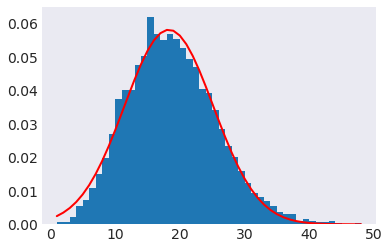

In [12]:
count, bins, ignored = plt.hist(y, 47, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

## Определение корреляции Пирсона

In [13]:
def pearson(a,b):
    a_avg, b_avg = np.average(a), np.average(b)
    a_stdev, b_stdev = np.std(a), np.std(b)
    n = len(a)
    denominator = a_stdev * b_stdev * n
    numerator = np.sum(np.multiply(a-a_avg, b-b_avg))
    p_coef = numerator/denominator
    return p_coef

In [14]:
# Корреляции входных признаков с ответом y
corrs = np.zeros((300))
for i in range(300):
    corrs[i] = pearson(Matrix[:,i], y)

## t-критерий Стьюдента для оценки значимости корреляции

In [15]:
t = np.zeros_like(corrs)
t = corrs/np.sqrt(1-corrs**2) * np.sqrt(300-2)

## Доверительный интервал для параметра 99%

In [16]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [94]:
mean_t, left_t, right_t = mean_confidence_interval(t, confidence=0.99999)

## Выделение значимых признаков(признаков, входящих в доверительный интервал)

In [95]:
count = 0                               # Кол-во незначимых признаков
imp = list()                            # Список индексов значимых признаков
for i in range(len(t)):
    if t[i] < left_t or t[i] > right_t:
        count += 1
    else:
        imp.append(i)
print(300 - count)
print(imp) 

64
[23, 53, 59, 62, 65, 68, 71, 74, 82, 83, 86, 87, 101, 105, 107, 110, 111, 114, 119, 126, 140, 142, 152, 153, 162, 166, 168, 174, 180, 181, 183, 186, 189, 190, 193, 198, 201, 205, 211, 213, 214, 216, 222, 225, 226, 228, 231, 232, 238, 240, 241, 246, 247, 252, 255, 259, 261, 264, 267, 273, 276, 280, 291, 298]


## Построение Матрицы __значимых__ признаков тренировочной и тестовой выборки

In [96]:
print(Matrix.shape)
Matrix1 = np.zeros((10000, 300-count))       # Матрица значимых признаков тренировочной выборки
for i in range(len(imp)): 
    Matrix1[:, i] = Matrix[:, imp[i]]
print(Matrix1.shape)

(10000, 300)
(10000, 64)


In [97]:
Tester_Matrix = np.zeros((50000, 300-count)) # Матрицы значимых признаков тестовой выборки
for i in range(len(imp)):
    Tester_Matrix[:, i] = Tester[:, imp[i]]
print(Tester_Matrix.shape)

(50000, 64)


# Сравнение классификаторов Sklearn

## Использование кросс-валидации для оценки моделей на данных(Matrix)

In [74]:
from sklearn.model_selection import KFold

In [84]:
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(Matrix1, y):
    X_train, X_test = Matrix1[train_index], Matrix1[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(X_train.shape)

(9000, 72)


### Непредвзятая проверка моделей обучения
1. Обучаем модели на разбитых в методе KFold данных
2. Выводим точности для каждой
3. Из лучших составляем ансамбль
4. Проверяем его точность в сравнении с отдельными моделями
5. Выбираем лучшую модель
6. Обучаем модель на всей выборке
7. Предсказываем ответ и отправляем на проверку

In [76]:
from sklearn.model_selection import GridSearchCV     #Поиск лучших моделей
from sklearn.neighbors import KNeighborsRegressor    #K ближайших соседей, определим лучший параметр
from sklearn.ensemble import RandomForestRegressor   #Случайный лес. ВАЖНО: ограничить max_depth, иначе ооочень долго
from sklearn.linear_model import LogisticRegression  #Логистическая регрессия
from sklearn.ensemble import VotingRegressor         #Регрессор голосвания - ансамбль лучших моделей
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree

#### KNN

In [28]:
knn = KNeighborsRegressor()
params_knn = {'n_neighbors': [100, 300, 500, 1000]}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

#save best model
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 300}


#### Random Forest(сравнение параметра n_estimators)

In [29]:
rf = RandomForestRegressor()
params_rf = {'n_estimators': [100, 500, 1000, 5000], 'max_depth' : [3]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_depth': 3, 'n_estimators': 5000}


#### Logistic Regression

In [30]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

#### SGDClassifier

In [31]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

#### Ada Boost

In [32]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

#### Decision tree

In [33]:
tre = tree.DecisionTreeRegressor()
tre.fit(X_train, y_train)

DecisionTreeRegressor()

#### Ансамбль моделей -- регрессор голосования

In [54]:
estimators=[('knn', knn_best), ('rf', rf_best), ('log', log), ('ada', ada), ('dec', tre), ('gaus', model), ('sgd', sgd)]
ensemble = VotingClassifier(estimators, voting='hard')

__Проверка результатов__

In [55]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

0.046

__Проверка точности предыдущих моделей__

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
def accuracy(model, X_test = X_test, y_test = y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [42]:
print("KNN " + str(knn_best.score(X_train, y_train)))
print("RandomForest " + str((rf_best.score(X_train, y_train))))
print("Logistic " + str(accuracy(log)))
print("SGD " + str(sgd.score(X_train, y_train)))
print("Ada " + str(ada.score(X_train, y_train)))
print("DecTree " + str(accuracy(tre)))

KNN 0.024570862459284304
RandomForest 0.07895576249155589
Logistic 0.046
SGD -2.9897434143987674e+25
Ada 0.16120463487274206
DecTree 0.04


In [43]:
# Ошибка модели RF
dif = np.abs(y_test - rf_best.predict(X_test)).mean()
print("Средняя абсолютная ошибка: " + str(dif))

Средняя абсолютная ошибка: 5.310826944651101


## Результат регрессоров sklearn
Лучшей моделью оказался: RandomForestRegressor(n_estimators = 5000, max_deph = 3)

Точность: 0.07895576249155589

Ошибка: 5.310826944651101

# Проверка ошибки -- средняя абсолютная ошибка

In [36]:
def dif(model, X_test = X_test, y_test = y_test):
    ans = np.abs(y_test - rf_best.predict(X_test)).mean()
    print("Средняя абсолютная ошибка: " + str(ans))
    return ans

# Тренировка лучшей модели регрессии RandomForestRegressor

## Подбор параметров
__Изначальные параметры__:
- n_estimators = 5000
- max_deph = 3

### Проверка параметра n_estimators для значений 10000 и 5000

In [23]:
rf_Best_n = RandomForestRegressor()
params_rf_Best_n = {'n_estimators': [5000], 'max_depth' : [1, 2, 3, 4, 5], 'max_features' : [7, 14, 21, 28, 35, 42]}
rf_gs_Best_n = GridSearchCV(rf_Best_n, params_rf_Best_n, cv=5)
rf_gs_Best_n.fit(X_train, y_train)

rf_best_Best_n = rf_gs_Best_n.best_estimator_
print(rf_gs_Best_n.best_params_)

KeyboardInterrupt: 

# Проверка других моделей регрессии(например, МНК)

На степенях полинома $\ge 7$ невозможно найти параметры, ошибка становится очень большой, порядка $10^{12}$

In [77]:
from scipy.optimize import curve_fit

In [125]:
l = 300  + 1 # кол-во признаков(при проверке проверялись 42 признака)

In [126]:
# 1-ая степень
for i in range(1, l):
    print('a'+str(i)+', ', end='')
# 2-ая степень
for i in range(1, l):
    print('b'+str(i)+', ', end='')
# 3-ья степень
for i in range(1, l):
    print('c'+str(i)+', ', end='')
# 4-ая степень
for i in range(1, l):
    print('d'+str(i)+', ', end='')
# 5-ая степень
#for i in range(1, l):
#    print('e'+str(i)+', ', end='')
# 6-ая степень
#for i in range(1, l):
#    print('f'+str(i)+', ', end='')

for i in range(1, l):
    print('a'+str(i)+'*X[:,'+str(i-1)+'] + ', end='')
for i in range(1, l):
    print('b'+str(i)+'*X[:,'+str(i-1)+']**2 + ', end='')
for i in range(1, l):
    print('c'+str(i)+'*X[:,'+str(i-1)+']**3 + ', end='')
for i in range(1, l):
    print('d'+str(i)+'*X[:,'+str(i-1)+']**4 + ', end='')
#for i in range(1, l):
#    print('e'+str(i)+'*X[:,'+str(i-1)+']**5 + ', end='')
#for i in range(1, l):
#    print('f'+str(i)+'*X[:,'+str(i-1)+']**6 + ', end='')

a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40, a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80, a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100, a101, a102, a103, a104, a105, a106, a107, a108, a109, a110, a111, a112, a113, a114, a115, a116, a117, a118, a119, a120, a121, a122, a123, a124, a125, a126, a127, a128, a129, a130, a131, a132, a133, a134, a135, a136, a137, a138, a139, a140, a141, a142, a143, a144, a145, a146, a147, a148, a149, a150, a151, a152, a153, a154, a155, a156, a157, a158, a159, a160, a161, a162, a163, a164, a165, a166, a167, a168, a169, a170, a171, a172, a173, a174, a175, a176, a177, a178, a179, a180, a181, a182, a183, a184, a185

In [127]:
def f(X, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40, a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80, a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100, a101, a102, a103, a104, a105, a106, a107, a108, a109, a110, a111, a112, a113, a114, a115, a116, a117, a118, a119, a120, a121, a122, a123, a124, a125, a126, a127, a128, a129, a130, a131, a132, a133, a134, a135, a136, a137, a138, a139, a140, a141, a142, a143, a144, a145, a146, a147, a148, a149, a150, a151, a152, a153, a154, a155, a156, a157, a158, a159, a160, a161, a162, a163, a164, a165, a166, a167, a168, a169, a170, a171, a172, a173, a174, a175, a176, a177, a178, a179, a180, a181, a182, a183, a184, a185, a186, a187, a188, a189, a190, a191, a192, a193, a194, a195, a196, a197, a198, a199, a200, a201, a202, a203, a204, a205, a206, a207, a208, a209, a210, a211, a212, a213, a214, a215, a216, a217, a218, a219, a220, a221, a222, a223, a224, a225, a226, a227, a228, a229, a230, a231, a232, a233, a234, a235, a236, a237, a238, a239, a240, a241, a242, a243, a244, a245, a246, a247, a248, a249, a250, a251, a252, a253, a254, a255, a256, a257, a258, a259, a260, a261, a262, a263, a264, a265, a266, a267, a268, a269, a270, a271, a272, a273, a274, a275, a276, a277, a278, a279, a280, a281, a282, a283, a284, a285, a286, a287, a288, a289, a290, a291, a292, a293, a294, a295, a296, a297, a298, a299, a300, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20, b21, b22, b23, b24, b25, b26, b27, b28, b29, b30, b31, b32, b33, b34, b35, b36, b37, b38, b39, b40, b41, b42, b43, b44, b45, b46, b47, b48, b49, b50, b51, b52, b53, b54, b55, b56, b57, b58, b59, b60, b61, b62, b63, b64, b65, b66, b67, b68, b69, b70, b71, b72, b73, b74, b75, b76, b77, b78, b79, b80, b81, b82, b83, b84, b85, b86, b87, b88, b89, b90, b91, b92, b93, b94, b95, b96, b97, b98, b99, b100, b101, b102, b103, b104, b105, b106, b107, b108, b109, b110, b111, b112, b113, b114, b115, b116, b117, b118, b119, b120, b121, b122, b123, b124, b125, b126, b127, b128, b129, b130, b131, b132, b133, b134, b135, b136, b137, b138, b139, b140, b141, b142, b143, b144, b145, b146, b147, b148, b149, b150, b151, b152, b153, b154, b155, b156, b157, b158, b159, b160, b161, b162, b163, b164, b165, b166, b167, b168, b169, b170, b171, b172, b173, b174, b175, b176, b177, b178, b179, b180, b181, b182, b183, b184, b185, b186, b187, b188, b189, b190, b191, b192, b193, b194, b195, b196, b197, b198, b199, b200, b201, b202, b203, b204, b205, b206, b207, b208, b209, b210, b211, b212, b213, b214, b215, b216, b217, b218, b219, b220, b221, b222, b223, b224, b225, b226, b227, b228, b229, b230, b231, b232, b233, b234, b235, b236, b237, b238, b239, b240, b241, b242, b243, b244, b245, b246, b247, b248, b249, b250, b251, b252, b253, b254, b255, b256, b257, b258, b259, b260, b261, b262, b263, b264, b265, b266, b267, b268, b269, b270, b271, b272, b273, b274, b275, b276, b277, b278, b279, b280, b281, b282, b283, b284, b285, b286, b287, b288, b289, b290, b291, b292, b293, b294, b295, b296, b297, b298, b299, b300, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30, c31, c32, c33, c34, c35, c36, c37, c38, c39, c40, c41, c42, c43, c44, c45, c46, c47, c48, c49, c50, c51, c52, c53, c54, c55, c56, c57, c58, c59, c60, c61, c62, c63, c64, c65, c66, c67, c68, c69, c70, c71, c72, c73, c74, c75, c76, c77, c78, c79, c80, c81, c82, c83, c84, c85, c86, c87, c88, c89, c90, c91, c92, c93, c94, c95, c96, c97, c98, c99, c100, c101, c102, c103, c104, c105, c106, c107, c108, c109, c110, c111, c112, c113, c114, c115, c116, c117, c118, c119, c120, c121, c122, c123, c124, c125, c126, c127, c128, c129, c130, c131, c132, c133, c134, c135, c136, c137, c138, c139, c140, c141, c142, c143, c144, c145, c146, c147, c148, c149, c150, c151, c152, c153, c154, c155, c156, c157, c158, c159, c160, c161, c162, c163, c164, c165, c166, c167, c168, c169, c170, c171, c172, c173, c174, c175, c176, c177, c178, c179, c180, c181, c182, c183, c184, c185, c186, c187, c188, c189, c190, c191, c192, c193, c194, c195, c196, c197, c198, c199, c200, c201, c202, c203, c204, c205, c206, c207, c208, c209, c210, c211, c212, c213, c214, c215, c216, c217, c218, c219, c220, c221, c222, c223, c224, c225, c226, c227, c228, c229, c230, c231, c232, c233, c234, c235, c236, c237, c238, c239, c240, c241, c242, c243, c244, c245, c246, c247, c248, c249, c250, c251, c252, c253, c254, c255, c256, c257, c258, c259, c260, c261, c262, c263, c264, c265, c266, c267, c268, c269, c270, c271, c272, c273, c274, c275, c276, c277, c278, c279, c280, c281, c282, c283, c284, c285, c286, c287, c288, c289, c290, c291, c292, c293, c294, c295, c296, c297, c298, c299, c300, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30, d31, d32, d33, d34, d35, d36, d37, d38, d39, d40, d41, d42, d43, d44, d45, d46, d47, d48, d49, d50, d51, d52, d53, d54, d55, d56, d57, d58, d59, d60, d61, d62, d63, d64, d65, d66, d67, d68, d69, d70, d71, d72, d73, d74, d75, d76, d77, d78, d79, d80, d81, d82, d83, d84, d85, d86, d87, d88, d89, d90, d91, d92, d93, d94, d95, d96, d97, d98, d99, d100, d101, d102, d103, d104, d105, d106, d107, d108, d109, d110, d111, d112, d113, d114, d115, d116, d117, d118, d119, d120, d121, d122, d123, d124, d125, d126, d127, d128, d129, d130, d131, d132, d133, d134, d135, d136, d137, d138, d139, d140, d141, d142, d143, d144, d145, d146, d147, d148, d149, d150, d151, d152, d153, d154, d155, d156, d157, d158, d159, d160, d161, d162, d163, d164, d165, d166, d167, d168, d169, d170, d171, d172, d173, d174, d175, d176, d177, d178, d179, d180, d181, d182, d183, d184, d185, d186, d187, d188, d189, d190, d191, d192, d193, d194, d195, d196, d197, d198, d199, d200, d201, d202, d203, d204, d205, d206, d207, d208, d209, d210, d211, d212, d213, d214, d215, d216, d217, d218, d219, d220, d221, d222, d223, d224, d225, d226, d227, d228, d229, d230, d231, d232, d233, d234, d235, d236, d237, d238, d239, d240, d241, d242, d243, d244, d245, d246, d247, d248, d249, d250, d251, d252, d253, d254, d255, d256, d257, d258, d259, d260, d261, d262, d263, d264, d265, d266, d267, d268, d269, d270, d271, d272, d273, d274, d275, d276, d277, d278, d279, d280, d281, d282, d283, d284, d285, d286, d287, d288, d289, d290, d291, d292, d293, d294, d295, d296, d297, d298, d299, d300,
      m):
    return (a1*X[:,0] + a2*X[:,1] + a3*X[:,2] + a4*X[:,3] + a5*X[:,4] + a6*X[:,5] + a7*X[:,6] + a8*X[:,7] + a9*X[:,8] + a10*X[:,9] + a11*X[:,10] + a12*X[:,11] + a13*X[:,12] + a14*X[:,13] + a15*X[:,14] + a16*X[:,15] + a17*X[:,16] + a18*X[:,17] + a19*X[:,18] + a20*X[:,19] + a21*X[:,20] + a22*X[:,21] + a23*X[:,22] + a24*X[:,23] + a25*X[:,24] + a26*X[:,25] + a27*X[:,26] + a28*X[:,27] + a29*X[:,28] + a30*X[:,29] + a31*X[:,30] + a32*X[:,31] + a33*X[:,32] + a34*X[:,33] + a35*X[:,34] + a36*X[:,35] + a37*X[:,36] + a38*X[:,37] + a39*X[:,38] + a40*X[:,39] + a41*X[:,40] + a42*X[:,41] + a43*X[:,42] + a44*X[:,43] + a45*X[:,44] + a46*X[:,45] + a47*X[:,46] + a48*X[:,47] + a49*X[:,48] + a50*X[:,49] + a51*X[:,50] + a52*X[:,51] + a53*X[:,52] + a54*X[:,53] + a55*X[:,54] + a56*X[:,55] + a57*X[:,56] + a58*X[:,57] + a59*X[:,58] + a60*X[:,59] + a61*X[:,60] + a62*X[:,61] + a63*X[:,62] + a64*X[:,63] + a65*X[:,64] + a66*X[:,65] + a67*X[:,66] + a68*X[:,67] + a69*X[:,68] + a70*X[:,69] + a71*X[:,70] + a72*X[:,71] + a73*X[:,72] + a74*X[:,73] + a75*X[:,74] + a76*X[:,75] + a77*X[:,76] + a78*X[:,77] + a79*X[:,78] + a80*X[:,79] + a81*X[:,80] + a82*X[:,81] + a83*X[:,82] + a84*X[:,83] + a85*X[:,84] + a86*X[:,85] + a87*X[:,86] + a88*X[:,87] + a89*X[:,88] + a90*X[:,89] + a91*X[:,90] + a92*X[:,91] + a93*X[:,92] + a94*X[:,93] + a95*X[:,94] + a96*X[:,95] + a97*X[:,96] + a98*X[:,97] + a99*X[:,98] + a100*X[:,99] + a101*X[:,100] + a102*X[:,101] + a103*X[:,102] + a104*X[:,103] + a105*X[:,104] + a106*X[:,105] + a107*X[:,106] + a108*X[:,107] + a109*X[:,108] + a110*X[:,109] + a111*X[:,110] + a112*X[:,111] + a113*X[:,112] + a114*X[:,113] + a115*X[:,114] + a116*X[:,115] + a117*X[:,116] + a118*X[:,117] + a119*X[:,118] + a120*X[:,119] + a121*X[:,120] + a122*X[:,121] + a123*X[:,122] + a124*X[:,123] + a125*X[:,124] + a126*X[:,125] + a127*X[:,126] + a128*X[:,127] + a129*X[:,128] + a130*X[:,129] + a131*X[:,130] + a132*X[:,131] + a133*X[:,132] + a134*X[:,133] + a135*X[:,134] + a136*X[:,135] + a137*X[:,136] + a138*X[:,137] + a139*X[:,138] + a140*X[:,139] + a141*X[:,140] + a142*X[:,141] + a143*X[:,142] + a144*X[:,143] + a145*X[:,144] + a146*X[:,145] + a147*X[:,146] + a148*X[:,147] + a149*X[:,148] + a150*X[:,149] + a151*X[:,150] + a152*X[:,151] + a153*X[:,152] + a154*X[:,153] + a155*X[:,154] + a156*X[:,155] + a157*X[:,156] + a158*X[:,157] + a159*X[:,158] + a160*X[:,159] + a161*X[:,160] + a162*X[:,161] + a163*X[:,162] + a164*X[:,163] + a165*X[:,164] + a166*X[:,165] + a167*X[:,166] + a168*X[:,167] + a169*X[:,168] + a170*X[:,169] + a171*X[:,170] + a172*X[:,171] + a173*X[:,172] + a174*X[:,173] + a175*X[:,174] + a176*X[:,175] + a177*X[:,176] + a178*X[:,177] + a179*X[:,178] + a180*X[:,179] + a181*X[:,180] + a182*X[:,181] + a183*X[:,182] + a184*X[:,183] + a185*X[:,184] + a186*X[:,185] + a187*X[:,186] + a188*X[:,187] + a189*X[:,188] + a190*X[:,189] + a191*X[:,190] + a192*X[:,191] + a193*X[:,192] + a194*X[:,193] + a195*X[:,194] + a196*X[:,195] + a197*X[:,196] + a198*X[:,197] + a199*X[:,198] + a200*X[:,199] + a201*X[:,200] + a202*X[:,201] + a203*X[:,202] + a204*X[:,203] + a205*X[:,204] + a206*X[:,205] + a207*X[:,206] + a208*X[:,207] + a209*X[:,208] + a210*X[:,209] + a211*X[:,210] + a212*X[:,211] + a213*X[:,212] + a214*X[:,213] + a215*X[:,214] + a216*X[:,215] + a217*X[:,216] + a218*X[:,217] + a219*X[:,218] + a220*X[:,219] + a221*X[:,220] + a222*X[:,221] + a223*X[:,222] + a224*X[:,223] + a225*X[:,224] + a226*X[:,225] + a227*X[:,226] + a228*X[:,227] + a229*X[:,228] + a230*X[:,229] + a231*X[:,230] + a232*X[:,231] + a233*X[:,232] + a234*X[:,233] + a235*X[:,234] + a236*X[:,235] + a237*X[:,236] + a238*X[:,237] + a239*X[:,238] + a240*X[:,239] + a241*X[:,240] + a242*X[:,241] + a243*X[:,242] + a244*X[:,243] + a245*X[:,244] + a246*X[:,245] + a247*X[:,246] + a248*X[:,247] + a249*X[:,248] + a250*X[:,249] + a251*X[:,250] + a252*X[:,251] + a253*X[:,252] + a254*X[:,253] + a255*X[:,254] + a256*X[:,255] + a257*X[:,256] + a258*X[:,257] + a259*X[:,258] + a260*X[:,259] + a261*X[:,260] + a262*X[:,261] + a263*X[:,262] + a264*X[:,263] + a265*X[:,264] + a266*X[:,265] + a267*X[:,266] + a268*X[:,267] + a269*X[:,268] + a270*X[:,269] + a271*X[:,270] + a272*X[:,271] + a273*X[:,272] + a274*X[:,273] + a275*X[:,274] + a276*X[:,275] + a277*X[:,276] + a278*X[:,277] + a279*X[:,278] + a280*X[:,279] + a281*X[:,280] + a282*X[:,281] + a283*X[:,282] + a284*X[:,283] + a285*X[:,284] + a286*X[:,285] + a287*X[:,286] + a288*X[:,287] + a289*X[:,288] + a290*X[:,289] + a291*X[:,290] + a292*X[:,291] + a293*X[:,292] + a294*X[:,293] + a295*X[:,294] + a296*X[:,295] + a297*X[:,296] + a298*X[:,297] + a299*X[:,298] + a300*X[:,299] + b1*X[:,0]**2 + b2*X[:,1]**2 + b3*X[:,2]**2 + b4*X[:,3]**2 + b5*X[:,4]**2 + b6*X[:,5]**2 + b7*X[:,6]**2 + b8*X[:,7]**2 + b9*X[:,8]**2 + b10*X[:,9]**2 + b11*X[:,10]**2 + b12*X[:,11]**2 + b13*X[:,12]**2 + b14*X[:,13]**2 + b15*X[:,14]**2 + b16*X[:,15]**2 + b17*X[:,16]**2 + b18*X[:,17]**2 + b19*X[:,18]**2 + b20*X[:,19]**2 + b21*X[:,20]**2 + b22*X[:,21]**2 + b23*X[:,22]**2 + b24*X[:,23]**2 + b25*X[:,24]**2 + b26*X[:,25]**2 + b27*X[:,26]**2 + b28*X[:,27]**2 + b29*X[:,28]**2 + b30*X[:,29]**2 + b31*X[:,30]**2 + b32*X[:,31]**2 + b33*X[:,32]**2 + b34*X[:,33]**2 + b35*X[:,34]**2 + b36*X[:,35]**2 + b37*X[:,36]**2 + b38*X[:,37]**2 + b39*X[:,38]**2 + b40*X[:,39]**2 + b41*X[:,40]**2 + b42*X[:,41]**2 + b43*X[:,42]**2 + b44*X[:,43]**2 + b45*X[:,44]**2 + b46*X[:,45]**2 + b47*X[:,46]**2 + b48*X[:,47]**2 + b49*X[:,48]**2 + b50*X[:,49]**2 + b51*X[:,50]**2 + b52*X[:,51]**2 + b53*X[:,52]**2 + b54*X[:,53]**2 + b55*X[:,54]**2 + b56*X[:,55]**2 + b57*X[:,56]**2 + b58*X[:,57]**2 + b59*X[:,58]**2 + b60*X[:,59]**2 + b61*X[:,60]**2 + b62*X[:,61]**2 + b63*X[:,62]**2 + b64*X[:,63]**2 + b65*X[:,64]**2 + b66*X[:,65]**2 + b67*X[:,66]**2 + b68*X[:,67]**2 + b69*X[:,68]**2 + b70*X[:,69]**2 + b71*X[:,70]**2 + b72*X[:,71]**2 + b73*X[:,72]**2 + b74*X[:,73]**2 + b75*X[:,74]**2 + b76*X[:,75]**2 + b77*X[:,76]**2 + b78*X[:,77]**2 + b79*X[:,78]**2 + b80*X[:,79]**2 + b81*X[:,80]**2 + b82*X[:,81]**2 + b83*X[:,82]**2 + b84*X[:,83]**2 + b85*X[:,84]**2 + b86*X[:,85]**2 + b87*X[:,86]**2 + b88*X[:,87]**2 + b89*X[:,88]**2 + b90*X[:,89]**2 + b91*X[:,90]**2 + b92*X[:,91]**2 + b93*X[:,92]**2 + b94*X[:,93]**2 + b95*X[:,94]**2 + b96*X[:,95]**2 + b97*X[:,96]**2 + b98*X[:,97]**2 + b99*X[:,98]**2 + b100*X[:,99]**2 + b101*X[:,100]**2 + b102*X[:,101]**2 + b103*X[:,102]**2 + b104*X[:,103]**2 + b105*X[:,104]**2 + b106*X[:,105]**2 + b107*X[:,106]**2 + b108*X[:,107]**2 + b109*X[:,108]**2 + b110*X[:,109]**2 + b111*X[:,110]**2 + b112*X[:,111]**2 + b113*X[:,112]**2 + b114*X[:,113]**2 + b115*X[:,114]**2 + b116*X[:,115]**2 + b117*X[:,116]**2 + b118*X[:,117]**2 + b119*X[:,118]**2 + b120*X[:,119]**2 + b121*X[:,120]**2 + b122*X[:,121]**2 + b123*X[:,122]**2 + b124*X[:,123]**2 + b125*X[:,124]**2 + b126*X[:,125]**2 + b127*X[:,126]**2 + b128*X[:,127]**2 + b129*X[:,128]**2 + b130*X[:,129]**2 + b131*X[:,130]**2 + b132*X[:,131]**2 + b133*X[:,132]**2 + b134*X[:,133]**2 + b135*X[:,134]**2 + b136*X[:,135]**2 + b137*X[:,136]**2 + b138*X[:,137]**2 + b139*X[:,138]**2 + b140*X[:,139]**2 + b141*X[:,140]**2 + b142*X[:,141]**2 + b143*X[:,142]**2 + b144*X[:,143]**2 + b145*X[:,144]**2 + b146*X[:,145]**2 + b147*X[:,146]**2 + b148*X[:,147]**2 + b149*X[:,148]**2 + b150*X[:,149]**2 + b151*X[:,150]**2 + b152*X[:,151]**2 + b153*X[:,152]**2 + b154*X[:,153]**2 + b155*X[:,154]**2 + b156*X[:,155]**2 + b157*X[:,156]**2 + b158*X[:,157]**2 + b159*X[:,158]**2 + b160*X[:,159]**2 + b161*X[:,160]**2 + b162*X[:,161]**2 + b163*X[:,162]**2 + b164*X[:,163]**2 + b165*X[:,164]**2 + b166*X[:,165]**2 + b167*X[:,166]**2 + b168*X[:,167]**2 + b169*X[:,168]**2 + b170*X[:,169]**2 + b171*X[:,170]**2 + b172*X[:,171]**2 + b173*X[:,172]**2 + b174*X[:,173]**2 + b175*X[:,174]**2 + b176*X[:,175]**2 + b177*X[:,176]**2 + b178*X[:,177]**2 + b179*X[:,178]**2 + b180*X[:,179]**2 + b181*X[:,180]**2 + b182*X[:,181]**2 + b183*X[:,182]**2 + b184*X[:,183]**2 + b185*X[:,184]**2 + b186*X[:,185]**2 + b187*X[:,186]**2 + b188*X[:,187]**2 + b189*X[:,188]**2 + b190*X[:,189]**2 + b191*X[:,190]**2 + b192*X[:,191]**2 + b193*X[:,192]**2 + b194*X[:,193]**2 + b195*X[:,194]**2 + b196*X[:,195]**2 + b197*X[:,196]**2 + b198*X[:,197]**2 + b199*X[:,198]**2 + b200*X[:,199]**2 + b201*X[:,200]**2 + b202*X[:,201]**2 + b203*X[:,202]**2 + b204*X[:,203]**2 + b205*X[:,204]**2 + b206*X[:,205]**2 + b207*X[:,206]**2 + b208*X[:,207]**2 + b209*X[:,208]**2 + b210*X[:,209]**2 + b211*X[:,210]**2 + b212*X[:,211]**2 + b213*X[:,212]**2 + b214*X[:,213]**2 + b215*X[:,214]**2 + b216*X[:,215]**2 + b217*X[:,216]**2 + b218*X[:,217]**2 + b219*X[:,218]**2 + b220*X[:,219]**2 + b221*X[:,220]**2 + b222*X[:,221]**2 + b223*X[:,222]**2 + b224*X[:,223]**2 + b225*X[:,224]**2 + b226*X[:,225]**2 + b227*X[:,226]**2 + b228*X[:,227]**2 + b229*X[:,228]**2 + b230*X[:,229]**2 + b231*X[:,230]**2 + b232*X[:,231]**2 + b233*X[:,232]**2 + b234*X[:,233]**2 + b235*X[:,234]**2 + b236*X[:,235]**2 + b237*X[:,236]**2 + b238*X[:,237]**2 + b239*X[:,238]**2 + b240*X[:,239]**2 + b241*X[:,240]**2 + b242*X[:,241]**2 + b243*X[:,242]**2 + b244*X[:,243]**2 + b245*X[:,244]**2 + b246*X[:,245]**2 + b247*X[:,246]**2 + b248*X[:,247]**2 + b249*X[:,248]**2 + b250*X[:,249]**2 + b251*X[:,250]**2 + b252*X[:,251]**2 + b253*X[:,252]**2 + b254*X[:,253]**2 + b255*X[:,254]**2 + b256*X[:,255]**2 + b257*X[:,256]**2 + b258*X[:,257]**2 + b259*X[:,258]**2 + b260*X[:,259]**2 + b261*X[:,260]**2 + b262*X[:,261]**2 + b263*X[:,262]**2 + b264*X[:,263]**2 + b265*X[:,264]**2 + b266*X[:,265]**2 + b267*X[:,266]**2 + b268*X[:,267]**2 + b269*X[:,268]**2 + b270*X[:,269]**2 + b271*X[:,270]**2 + b272*X[:,271]**2 + b273*X[:,272]**2 + b274*X[:,273]**2 + b275*X[:,274]**2 + b276*X[:,275]**2 + b277*X[:,276]**2 + b278*X[:,277]**2 + b279*X[:,278]**2 + b280*X[:,279]**2 + b281*X[:,280]**2 + b282*X[:,281]**2 + b283*X[:,282]**2 + b284*X[:,283]**2 + b285*X[:,284]**2 + b286*X[:,285]**2 + b287*X[:,286]**2 + b288*X[:,287]**2 + b289*X[:,288]**2 + b290*X[:,289]**2 + b291*X[:,290]**2 + b292*X[:,291]**2 + b293*X[:,292]**2 + b294*X[:,293]**2 + b295*X[:,294]**2 + b296*X[:,295]**2 + 
            b297*X[:,296]**2 + b298*X[:,297]**2 + b299*X[:,298]**2 + b300*X[:,299]**2 + c1*X[:,0]**3 + c2*X[:,1]**3 + c3*X[:,2]**3 + c4*X[:,3]**3 + c5*X[:,4]**3 + c6*X[:,5]**3 + c7*X[:,6]**3 + c8*X[:,7]**3 + c9*X[:,8]**3 + c10*X[:,9]**3 + c11*X[:,10]**3 + c12*X[:,11]**3 + c13*X[:,12]**3 + c14*X[:,13]**3 + c15*X[:,14]**3 + c16*X[:,15]**3 + c17*X[:,16]**3 + c18*X[:,17]**3 + c19*X[:,18]**3 + c20*X[:,19]**3 + c21*X[:,20]**3 + c22*X[:,21]**3 + c23*X[:,22]**3 + c24*X[:,23]**3 + c25*X[:,24]**3 + c26*X[:,25]**3 + c27*X[:,26]**3 + c28*X[:,27]**3 + c29*X[:,28]**3 + c30*X[:,29]**3 + c31*X[:,30]**3 + c32*X[:,31]**3 + c33*X[:,32]**3 + c34*X[:,33]**3 + c35*X[:,34]**3 + c36*X[:,35]**3 + c37*X[:,36]**3 + c38*X[:,37]**3 + c39*X[:,38]**3 + c40*X[:,39]**3 + c41*X[:,40]**3 + c42*X[:,41]**3 + c43*X[:,42]**3 + c44*X[:,43]**3 + c45*X[:,44]**3 + c46*X[:,45]**3 + c47*X[:,46]**3 + c48*X[:,47]**3 + c49*X[:,48]**3 + c50*X[:,49]**3 + c51*X[:,50]**3 + c52*X[:,51]**3 + c53*X[:,52]**3 + c54*X[:,53]**3 + c55*X[:,54]**3 + c56*X[:,55]**3 + c57*X[:,56]**3 + c58*X[:,57]**3 + c59*X[:,58]**3 + c60*X[:,59]**3 + c61*X[:,60]**3 + c62*X[:,61]**3 + c63*X[:,62]**3 + c64*X[:,63]**3 + c65*X[:,64]**3 + c66*X[:,65]**3 + c67*X[:,66]**3 + c68*X[:,67]**3 + c69*X[:,68]**3 + c70*X[:,69]**3 + c71*X[:,70]**3 + c72*X[:,71]**3 + c73*X[:,72]**3 + c74*X[:,73]**3 + c75*X[:,74]**3 + c76*X[:,75]**3 + c77*X[:,76]**3 + c78*X[:,77]**3 + c79*X[:,78]**3 + c80*X[:,79]**3 + c81*X[:,80]**3 + c82*X[:,81]**3 + c83*X[:,82]**3 + c84*X[:,83]**3 + c85*X[:,84]**3 + c86*X[:,85]**3 + c87*X[:,86]**3 + c88*X[:,87]**3 + c89*X[:,88]**3 + c90*X[:,89]**3 + c91*X[:,90]**3 + c92*X[:,91]**3 + c93*X[:,92]**3 + c94*X[:,93]**3 + c95*X[:,94]**3 + c96*X[:,95]**3 + c97*X[:,96]**3 + c98*X[:,97]**3 + c99*X[:,98]**3 + c100*X[:,99]**3 + c101*X[:,100]**3 + c102*X[:,101]**3 + c103*X[:,102]**3 + c104*X[:,103]**3 + c105*X[:,104]**3 + c106*X[:,105]**3 + c107*X[:,106]**3 + c108*X[:,107]**3 + c109*X[:,108]**3 + c110*X[:,109]**3 + c111*X[:,110]**3 + c112*X[:,111]**3 + c113*X[:,112]**3 + c114*X[:,113]**3 + c115*X[:,114]**3 + c116*X[:,115]**3 + c117*X[:,116]**3 + c118*X[:,117]**3 + c119*X[:,118]**3 + c120*X[:,119]**3 + c121*X[:,120]**3 + c122*X[:,121]**3 + c123*X[:,122]**3 + c124*X[:,123]**3 + c125*X[:,124]**3 + c126*X[:,125]**3 + c127*X[:,126]**3 + c128*X[:,127]**3 + c129*X[:,128]**3 + c130*X[:,129]**3 + c131*X[:,130]**3 + c132*X[:,131]**3 + c133*X[:,132]**3 + c134*X[:,133]**3 + c135*X[:,134]**3 + c136*X[:,135]**3 + c137*X[:,136]**3 + c138*X[:,137]**3 + c139*X[:,138]**3 + c140*X[:,139]**3 + c141*X[:,140]**3 + c142*X[:,141]**3 + c143*X[:,142]**3 + c144*X[:,143]**3 + c145*X[:,144]**3 + c146*X[:,145]**3 + c147*X[:,146]**3 + c148*X[:,147]**3 + c149*X[:,148]**3 + c150*X[:,149]**3 + c151*X[:,150]**3 + c152*X[:,151]**3 + c153*X[:,152]**3 + c154*X[:,153]**3 + c155*X[:,154]**3 + c156*X[:,155]**3 + c157*X[:,156]**3 + c158*X[:,157]**3 + c159*X[:,158]**3 + c160*X[:,159]**3 + c161*X[:,160]**3 + c162*X[:,161]**3 + c163*X[:,162]**3 + c164*X[:,163]**3 + c165*X[:,164]**3 + c166*X[:,165]**3 + c167*X[:,166]**3 + c168*X[:,167]**3 + c169*X[:,168]**3 + c170*X[:,169]**3 + c171*X[:,170]**3 + c172*X[:,171]**3 + c173*X[:,172]**3 + c174*X[:,173]**3 + c175*X[:,174]**3 + c176*X[:,175]**3 + c177*X[:,176]**3 + c178*X[:,177]**3 + c179*X[:,178]**3 + c180*X[:,179]**3 + c181*X[:,180]**3 + c182*X[:,181]**3 + c183*X[:,182]**3 + c184*X[:,183]**3 + c185*X[:,184]**3 + c186*X[:,185]**3 + c187*X[:,186]**3 + c188*X[:,187]**3 + c189*X[:,188]**3 + c190*X[:,189]**3 + c191*X[:,190]**3 + c192*X[:,191]**3 + c193*X[:,192]**3 + c194*X[:,193]**3 + c195*X[:,194]**3 + c196*X[:,195]**3 + c197*X[:,196]**3 + c198*X[:,197]**3 + c199*X[:,198]**3 + c200*X[:,199]**3 + c201*X[:,200]**3 + c202*X[:,201]**3 + c203*X[:,202]**3 + c204*X[:,203]**3 + c205*X[:,204]**3 + c206*X[:,205]**3 + c207*X[:,206]**3 + c208*X[:,207]**3 + c209*X[:,208]**3 + c210*X[:,209]**3 + c211*X[:,210]**3 + c212*X[:,211]**3 + c213*X[:,212]**3 + c214*X[:,213]**3 + c215*X[:,214]**3 + c216*X[:,215]**3 + c217*X[:,216]**3 + c218*X[:,217]**3 + c219*X[:,218]**3 + c220*X[:,219]**3 + c221*X[:,220]**3 + c222*X[:,221]**3 + c223*X[:,222]**3 + c224*X[:,223]**3 + c225*X[:,224]**3 + c226*X[:,225]**3 + c227*X[:,226]**3 + c228*X[:,227]**3 + c229*X[:,228]**3 + c230*X[:,229]**3 + c231*X[:,230]**3 + c232*X[:,231]**3 + c233*X[:,232]**3 + c234*X[:,233]**3 + c235*X[:,234]**3 + c236*X[:,235]**3 + c237*X[:,236]**3 + c238*X[:,237]**3 + c239*X[:,238]**3 + c240*X[:,239]**3 + c241*X[:,240]**3 + c242*X[:,241]**3 + c243*X[:,242]**3 + c244*X[:,243]**3 + c245*X[:,244]**3 + c246*X[:,245]**3 + c247*X[:,246]**3 + c248*X[:,247]**3 + c249*X[:,248]**3 + c250*X[:,249]**3 + c251*X[:,250]**3 + c252*X[:,251]**3 + c253*X[:,252]**3 + c254*X[:,253]**3 + c255*X[:,254]**3 + c256*X[:,255]**3 + c257*X[:,256]**3 + c258*X[:,257]**3 + c259*X[:,258]**3 + c260*X[:,259]**3 + c261*X[:,260]**3 + c262*X[:,261]**3 + c263*X[:,262]**3 + c264*X[:,263]**3 + c265*X[:,264]**3 + c266*X[:,265]**3 + c267*X[:,266]**3 + c268*X[:,267]**3 + c269*X[:,268]**3 + c270*X[:,269]**3 + c271*X[:,270]**3 + c272*X[:,271]**3 + c273*X[:,272]**3 + c274*X[:,273]**3 + c275*X[:,274]**3 + c276*X[:,275]**3 + c277*X[:,276]**3 + c278*X[:,277]**3 + c279*X[:,278]**3 + c280*X[:,279]**3 + c281*X[:,280]**3 + c282*X[:,281]**3 + c283*X[:,282]**3 + c284*X[:,283]**3 + c285*X[:,284]**3 + c286*X[:,285]**3 + c287*X[:,286]**3 + c288*X[:,287]**3 + c289*X[:,288]**3 + c290*X[:,289]**3 + c291*X[:,290]**3 + c292*X[:,291]**3 + c293*X[:,292]**3 + c294*X[:,293]**3 + c295*X[:,294]**3 + c296*X[:,295]**3 + c297*X[:,296]**3 + c298*X[:,297]**3 + c299*X[:,298]**3 + c300*X[:,299]**3 + d1*X[:,0]**4 + d2*X[:,1]**4 + d3*X[:,2]**4 + d4*X[:,3]**4 + d5*X[:,4]**4 + d6*X[:,5]**4 + d7*X[:,6]**4 + d8*X[:,7]**4 + d9*X[:,8]**4 + d10*X[:,9]**4 + d11*X[:,10]**4 + d12*X[:,11]**4 + d13*X[:,12]**4 + d14*X[:,13]**4 + d15*X[:,14]**4 + d16*X[:,15]**4 + d17*X[:,16]**4 + d18*X[:,17]**4 + d19*X[:,18]**4 + d20*X[:,19]**4 + d21*X[:,20]**4 + d22*X[:,21]**4 + d23*X[:,22]**4 + d24*X[:,23]**4 + d25*X[:,24]**4 + d26*X[:,25]**4 + d27*X[:,26]**4 + d28*X[:,27]**4 + d29*X[:,28]**4 + d30*X[:,29]**4 + d31*X[:,30]**4 + d32*X[:,31]**4 + d33*X[:,32]**4 + d34*X[:,33]**4 + d35*X[:,34]**4 + d36*X[:,35]**4 + d37*X[:,36]**4 + d38*X[:,37]**4 + d39*X[:,38]**4 + d40*X[:,39]**4 + d41*X[:,40]**4 + d42*X[:,41]**4 + d43*X[:,42]**4 + d44*X[:,43]**4 + d45*X[:,44]**4 + d46*X[:,45]**4 + d47*X[:,46]**4 + d48*X[:,47]**4 + d49*X[:,48]**4 + d50*X[:,49]**4 + d51*X[:,50]**4 + d52*X[:,51]**4 + d53*X[:,52]**4 + d54*X[:,53]**4 + d55*X[:,54]**4 + d56*X[:,55]**4 + d57*X[:,56]**4 + d58*X[:,57]**4 + d59*X[:,58]**4 + d60*X[:,59]**4 + d61*X[:,60]**4 + d62*X[:,61]**4 + d63*X[:,62]**4 + d64*X[:,63]**4 + d65*X[:,64]**4 + d66*X[:,65]**4 + d67*X[:,66]**4 + d68*X[:,67]**4 + d69*X[:,68]**4 + d70*X[:,69]**4 + d71*X[:,70]**4 + d72*X[:,71]**4 + d73*X[:,72]**4 + d74*X[:,73]**4 + d75*X[:,74]**4 + d76*X[:,75]**4 + d77*X[:,76]**4 + d78*X[:,77]**4 + d79*X[:,78]**4 + d80*X[:,79]**4 + d81*X[:,80]**4 + d82*X[:,81]**4 + d83*X[:,82]**4 + d84*X[:,83]**4 + d85*X[:,84]**4 + d86*X[:,85]**4 + d87*X[:,86]**4 + d88*X[:,87]**4 + d89*X[:,88]**4 + d90*X[:,89]**4 + d91*X[:,90]**4 + d92*X[:,91]**4 + d93*X[:,92]**4 + d94*X[:,93]**4 + d95*X[:,94]**4 + d96*X[:,95]**4 + d97*X[:,96]**4 + d98*X[:,97]**4 + d99*X[:,98]**4 + d100*X[:,99]**4 + d101*X[:,100]**4 + d102*X[:,101]**4 + d103*X[:,102]**4 + d104*X[:,103]**4 + d105*X[:,104]**4 + d106*X[:,105]**4 + d107*X[:,106]**4 + d108*X[:,107]**4 + d109*X[:,108]**4 + d110*X[:,109]**4 + d111*X[:,110]**4 + d112*X[:,111]**4 + d113*X[:,112]**4 + d114*X[:,113]**4 + d115*X[:,114]**4 + d116*X[:,115]**4 + d117*X[:,116]**4 + d118*X[:,117]**4 + d119*X[:,118]**4 + d120*X[:,119]**4 + d121*X[:,120]**4 + d122*X[:,121]**4 + d123*X[:,122]**4 + d124*X[:,123]**4 + d125*X[:,124]**4 + d126*X[:,125]**4 + d127*X[:,126]**4 + d128*X[:,127]**4 + d129*X[:,128]**4 + d130*X[:,129]**4 + d131*X[:,130]**4 + d132*X[:,131]**4 + d133*X[:,132]**4 + d134*X[:,133]**4 + d135*X[:,134]**4 + d136*X[:,135]**4 + d137*X[:,136]**4 + d138*X[:,137]**4 + d139*X[:,138]**4 + d140*X[:,139]**4 + d141*X[:,140]**4 + d142*X[:,141]**4 + d143*X[:,142]**4 + d144*X[:,143]**4 + d145*X[:,144]**4 + d146*X[:,145]**4 + d147*X[:,146]**4 + d148*X[:,147]**4 + d149*X[:,148]**4 + d150*X[:,149]**4 + d151*X[:,150]**4 + d152*X[:,151]**4 + d153*X[:,152]**4 + d154*X[:,153]**4 + d155*X[:,154]**4 + d156*X[:,155]**4 + d157*X[:,156]**4 + d158*X[:,157]**4 + d159*X[:,158]**4 + d160*X[:,159]**4 + d161*X[:,160]**4 + d162*X[:,161]**4 + d163*X[:,162]**4 + d164*X[:,163]**4 + d165*X[:,164]**4 + d166*X[:,165]**4 + d167*X[:,166]**4 + d168*X[:,167]**4 + d169*X[:,168]**4 + d170*X[:,169]**4 + d171*X[:,170]**4 + d172*X[:,171]**4 + d173*X[:,172]**4 + d174*X[:,173]**4 + d175*X[:,174]**4 + d176*X[:,175]**4 + d177*X[:,176]**4 + d178*X[:,177]**4 + d179*X[:,178]**4 + d180*X[:,179]**4 + d181*X[:,180]**4 + d182*X[:,181]**4 + d183*X[:,182]**4 + d184*X[:,183]**4 + d185*X[:,184]**4 + d186*X[:,185]**4 + d187*X[:,186]**4 + d188*X[:,187]**4 + d189*X[:,188]**4 + d190*X[:,189]**4 + d191*X[:,190]**4 + d192*X[:,191]**4 + d193*X[:,192]**4 + d194*X[:,193]**4 + d195*X[:,194]**4 + d196*X[:,195]**4 + d197*X[:,196]**4 + d198*X[:,197]**4 + d199*X[:,198]**4 + d200*X[:,199]**4 + d201*X[:,200]**4 + d202*X[:,201]**4 + d203*X[:,202]**4 + d204*X[:,203]**4 + d205*X[:,204]**4 + d206*X[:,205]**4 + d207*X[:,206]**4 + d208*X[:,207]**4 + d209*X[:,208]**4 + d210*X[:,209]**4 + d211*X[:,210]**4 + d212*X[:,211]**4 + d213*X[:,212]**4 + d214*X[:,213]**4 + d215*X[:,214]**4 + d216*X[:,215]**4 + d217*X[:,216]**4 + d218*X[:,217]**4 + d219*X[:,218]**4 + d220*X[:,219]**4 + d221*X[:,220]**4 + d222*X[:,221]**4 + d223*X[:,222]**4 + d224*X[:,223]**4 + d225*X[:,224]**4 + d226*X[:,225]**4 + d227*X[:,226]**4 + d228*X[:,227]**4 + d229*X[:,228]**4 + d230*X[:,229]**4 + d231*X[:,230]**4 + d232*X[:,231]**4 + d233*X[:,232]**4 + d234*X[:,233]**4 + d235*X[:,234]**4 + d236*X[:,235]**4 + d237*X[:,236]**4 + d238*X[:,237]**4 + d239*X[:,238]**4 + d240*X[:,239]**4 + d241*X[:,240]**4 + d242*X[:,241]**4 + d243*X[:,242]**4 + d244*X[:,243]**4 + d245*X[:,244]**4 + d246*X[:,245]**4 + d247*X[:,246]**4 + d248*X[:,247]**4 + d249*X[:,248]**4 + d250*X[:,249]**4 + d251*X[:,250]**4 + d252*X[:,251]**4 + d253*X[:,252]**4 + d254*X[:,253]**4 + d255*X[:,254]**4 + d256*X[:,255]**4 + d257*X[:,256]**4 + d258*X[:,257]**4 + d259*X[:,258]**4 + d260*X[:,259]**4 + d261*X[:,260]**4 + d262*X[:,261]**4 + d263*X[:,262]**4 + d264*X[:,263]**4 + d265*X[:,264]**4 + d266*X[:,265]**4 + d267*X[:,266]**4 + d268*X[:,267]**4 + d269*X[:,268]**4 + d270*X[:,269]**4 + d271*X[:,270]**4 + d272*X[:,271]**4 + d273*X[:,272]**4 + d274*X[:,273]**4 + d275*X[:,274]**4 + d276*X[:,275]**4 + d277*X[:,276]**4 + d278*X[:,277]**4 + d279*X[:,278]**4 + d280*X[:,279]**4 + d281*X[:,280]**4 + d282*X[:,281]**4 + d283*X[:,282]**4 + d284*X[:,283]**4 + d285*X[:,284]**4 + d286*X[:,285]**4 + d287*X[:,286]**4 + d288*X[:,287]**4 + d289*X[:,288]**4 + d290*X[:,289]**4 + d291*X[:,290]**4 + d292*X[:,291]**4 + d293*X[:,292]**4 + d294*X[:,293]**4 + d295*X[:,294]**4 + d296*X[:,295]**4 + d297*X[:,296]**4 + d298*X[:,297]**4 + d299*X[:,298]**4 + d300*X[:,299]**4 + 
            m)

In [129]:
print(Matrix.shape)

(10000, 300)


In [ ]:
cofs, _ = curve_fit(f, Matrix, y)

In [ ]:
print(cofs.shape)

In [ ]:
l1 = l-1

In [ ]:
def fun(X, ar):
    return (X.dot(ar[:l1]) + (X**2).dot(ar[l1:(2*l1)]) + (X**3).dot(ar[(2*l1):(3*l1)]) +
            (X**4).dot(ar[(3*l1):(4*l1)]) + #(X**5).dot(ar[(4*l1):(5*l1)]) + (X**6).dot(ar[(5*l1):(6*l1)]) +
            ar[-1])

## 300 признаков

In [123]:
y_mnk = fun(Tester, cofs)
print(y_mnk.shape)
print(y_mnk)
dif = np.abs(y - fun(Matrix, cofs)).mean()
print(dif)

(50000,)
[15.13076132 16.83992398 22.72160036 ... 24.54402329 13.2664036
 11.94999419]
3.0980969653808157


In [107]:
y_mnk = fun(Tester_Matrix, cofs)
print(y_mnk.shape)
print(y_mnk)
dif = np.abs(y - fun(Matrix1, cofs)).mean()
print(dif)

(50000,)
[17.75566128 20.25299547 17.40513659 ... 13.92114814 16.13770784
 16.71005132]
4.611651715730697


## Результат подбора параметров для МНК полинома 6-ой степени от 42 значимых признаков

In [59]:
y_mnk = fun(Tester_Matrix, cofs)
print(y_mnk.shape)
print(y_mnk)

(50000,)
[15.3249454  19.30929694 16.91540181 ... 15.55070284 19.10789593
 16.15705615]


In [60]:
dif = np.abs(y - fun(Matrix1, cofs)).mean()
print(dif)

4.870604365694106


# Deep Learning algorithm

Для одного слоя размера 128 результат 6.39

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import models
import os

In [53]:
dl = Sequential()
dl.add(Dense(200, activation = 'relu', input_shape=(X_train.shape[1],)))
dl.add(Dense(100, activation='relu', input_shape =(45,)))
dl.add(Dense(1))
dl.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [54]:
def check_stat(model, X_test = X_test, y_test = y_test, path = './Best_Model/dl_model.h5'):
    mse, mae = model.evaluate(X_test, y_test, verbose=0)
    print("Средняя абсолютная ошибка: " + str(mae))
    model.save(path)

In [55]:
def get_model(path = './Best_Model/dl_model.h5'):
    model = load_model(path)
    return model

In [56]:
dl.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
9000/9000 - 9s - loss: 53.1983 - mae: 5.7283
Epoch 2/100
9000/9000 - 7s - loss: 40.1535 - mae: 5.0514
Epoch 3/100
9000/9000 - 7s - loss: 35.8744 - mae: 4.7551
Epoch 4/100
9000/9000 - 7s - loss: 33.1565 - mae: 4.5893
Epoch 5/100
9000/9000 - 7s - loss: 30.9693 - mae: 4.4162
Epoch 6/100
9000/9000 - 7s - loss: 27.9776 - mae: 4.1873
Epoch 7/100
9000/9000 - 7s - loss: 26.2744 - mae: 4.0286
Epoch 8/100
9000/9000 - 7s - loss: 23.6747 - mae: 3.8287
Epoch 9/100
9000/9000 - 8s - loss: 21.5139 - mae: 3.6592
Epoch 10/100
9000/9000 - 7s - loss: 19.2238 - mae: 3.4440
Epoch 11/100
9000/9000 - 7s - loss: 17.5178 - mae: 3.3049
Epoch 12/100
9000/9000 - 7s - loss: 16.2375 - mae: 3.1781
Epoch 13/100
9000/9000 - 7s - loss: 14.6881 - mae: 3.0192
Epoch 14/100
9000/9000 - 11s - loss: 13.4697 - mae: 2.8803
Epoch 15/100
9000/9000 - 9s - loss: 12.2594 - mae: 2.7452
Epoch 16/100
9000/9000 - 7s - loss: 11.5528 - mae: 2.6782
Epoch 17/100
9000/9000 - 8s - loss: 10.5670 - mae: 2.5566
Epoch 18/100
9000/9000

In [57]:
check_stat(dl)

Средняя абсолютная ошибка: 5.352691173553467


# Подготовка к отпарвке решения

## Сохранение ответа

In [63]:
print(Tester.shape)
print(X_test.shape)

(50000, 300)
(1000, 300)


In [65]:
y_dl = dl.predict(Tester)
print(y_dl.shape)
print(y_dl)
y_dl = y_dl.reshape(-1)
print(y_dl.shape)

(50000, 1)
[[14.322632]
 [20.470467]
 [24.812355]
 ...
 [16.46988 ]
 [18.800137]
 [22.73212 ]]
(50000,)


In [124]:
# сохранить решение
pd.DataFrame({'id': np.arange(50000), 'y':y_mnk}).to_csv('solution.csv', index=False)